# **SyriaTel churn prediction**
**Student name:**
- Abdideq Adan


## **1. Business Understanding**
The main goal of this project is to help SyriaTel, a telecommunications company, predict whether their customers are likely to stop using their services soon, a situation known as "churn." The focus is on creating a system that can classify customers into two groups: those likely to churn and those likely to stay. By doing this, SyriaTel can identify potential issues and patterns that lead to customers leaving. This information is valuable because it allows the company to take proactive steps to keep customers satisfied and prevent them from leaving. The project is essential for SyriaTel's business as it helps them save money and maintain a strong relationship with their customers by addressing any concerns that might lead to churn. Ultimately, the aim is to build a tool that can assist SyriaTel in making informed decisions to reduce customer turnover and improve overall customer experience.

## **2. Data Understanding**

In this data science project, we are provided with a dataset containing information on 3333 telecom customers, organized into 21 columns. The dataset includes both categorical and numerical features, providing a comprehensive overview of customer behavior and usage patterns.

Categorical features such as "state," "international plan," and "voice mail plan" provide insights into the geographic distribution of customers and their subscription plans. Meanwhile, numerical features like "account length," "total day minutes," and "customer service calls" offer quantitative metrics to analyze customer engagement and satisfaction.

The dataset seems to be well-prepared, with no missing values across all columns. The "churn" column, represented as a boolean, will likely serve as the target variable, indicating whether a customer has discontinued their service.

Each customer's phone number is also included, but its role in the analysis might be limited, considering its uniqueness for each entry. The "area code" column, representing the geographic area of the customer, adds another layer of granularity to the analysis.

The numerical columns, such as "total day minutes" and "total intl charge," offer a rich set of features to explore customer usage patterns throughout different times of the day and international calling behavior. The "customer service calls" column is particularly interesting as it provides insight into customer satisfaction and potential issues requiring resolution.

Understanding these features lays the foundation for further exploration and analysis. As we progress through the data science project, we can delve into exploratory data analysis, feature engineering, and predictive modeling, aiming to uncover patterns and factors influencing customer churn. The comprehensive nature of this dataset makes it a valuable resource for deriving meaningful insights that can inform business strategies and improve customer retention.

## **3. Data Preparation**

### **3.1 Importing libraries and data understanding**

In [772]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

# deployment
import joblib


# Filter warnings
import warnings
warnings.filterwarnings("ignore")


# Set visualization style
sns.set_style("darkgrid")

# Display plots in the notebook
%matplotlib inline


In [773]:
# Data sourcing class 

class DataSourcing:
    def __init__(self, data_source):
        self.data_source = data_source
        self.raw_data = None  
    def load_data(self):
        self.raw_data = pd.read_csv(self.data_source)
        print("Data loaded successfully.")

df= DataSourcing(data_source="./data/bigml_59c28831336c6604c800002a.csv")
df.load_data()

df.raw_data.head()

Data loaded successfully.


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [774]:
# Tail of the data
df.raw_data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [775]:
# checking number of rows and column in the data
df.raw_data.shape

(3333, 21)

In [776]:
# Columns present in the data
df.raw_data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [777]:
# Data types of all columns in the dataframe
df.raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

#### Data preprocessing

In [778]:
# checking for null values
df.raw_data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [779]:
# checking for duplicate values
df.raw_data.duplicated().sum()

0

In [780]:
df.raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


### Based on the test results :
- it can be deduced that the data is free from both missing values and duplicates.

### **Feature selection and engineering**

In [781]:
# droping phone number
df.raw_data = df.raw_data.drop('phone number', axis=1)

In [782]:
# Converting string-based categorical values to integer-based categorical representations
intl_plan = {'yes': 1, 'no': 0}
vm_plan = {'yes': 1, 'no': 0}
churn_status = {True: 1, False: 0}

df.raw_data['international plan'].replace(intl_plan, inplace=True)
df.raw_data['voice mail plan'].replace(vm_plan, inplace=True)
df.raw_data['churn'].replace(churn_status, inplace=True)


In [783]:
df.raw_data['total minutes'] = df.raw_data['total day minutes'] + df.raw_data['total eve minutes'] + df.raw_data['total night minutes']
df.raw_data['total charge'] = df.raw_data['total day charge'] + df.raw_data['total eve charge'] + df.raw_data['total night charge']

In [784]:
# Example: Descriptive statistics for the new columns
print(df.raw_data[['total minutes', 'total charge']].describe())


       total minutes  total charge
count    3333.000000   3333.000000
mean      581.627483     56.685173
std        89.969330     10.487816
min       275.200000     19.980000
25%       521.000000     49.590000
50%       583.100000     56.630000
75%       642.500000     63.650000
max       876.900000     92.560000


In [785]:
# These columns are now represented by 'total minutes' and 'total charges,' so they are subsequently dropped.
new_df = df.raw_data.copy()
new_df.drop(['total day minutes', 'total eve minutes', 'total night minutes', 'total day charge', 'total eve charge', 'total night charge'], axis=1, inplace=True)

new_df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total eve calls,total night calls,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total minutes,total charge
0,KS,128,415,0,1,25,110,99,91,10.0,3,2.70,1,0,707.2,72.86
1,OH,107,415,0,1,26,123,103,103,13.7,3,3.70,1,0,611.5,55.54
2,NJ,137,415,0,0,0,114,110,104,12.2,5,3.29,0,0,527.2,59.00
3,OH,84,408,1,0,0,71,88,89,6.6,7,1.78,2,0,558.2,65.02
4,OK,75,415,1,0,0,113,122,121,10.1,3,2.73,3,0,501.9,49.36


### From the feature engineering analysis above:

- It appears that the phone number, while included for each customer, may not play a significant role in the analysis due to its unique nature for each entry, so we decided to drop it.
- We converted the international plan, voice mail plan, and churn variables from string categorical to numerical categorical.
- Additionally, we combined total day, evening, and night minutes, as well as their corresponding charges, summing them up for a comprehensive view. Subsequently, we removed these individual components since they are already represented in the data.

### **3.2 EDA**

#### **3.2.1 Univariate analysis**

In [786]:
new_df.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day calls            119
total eve calls            123
total night calls          120
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
total minutes             2395
total charge              2611
dtype: int64

### From the above we can infer that:
- The dataset comprises categorical information such as International plan, voice mail plan, churn, area code, total eve calls, and numerical data encompassing the remaining variables.


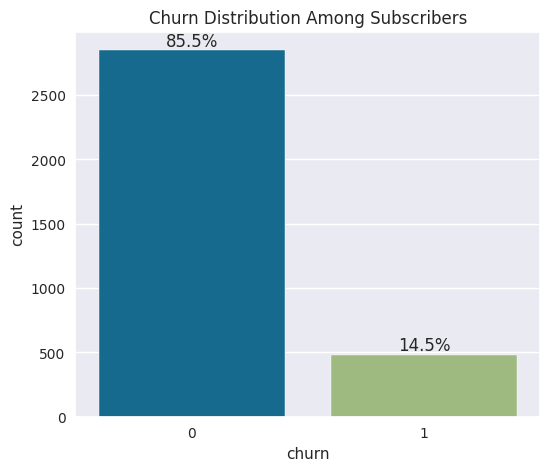

In [787]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='churn', data=new_df)

total = len(new_df['churn'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.title("Churn Distribution Among Subscribers")
plt.show()

#### **3.2.2 Bivariate analysis**

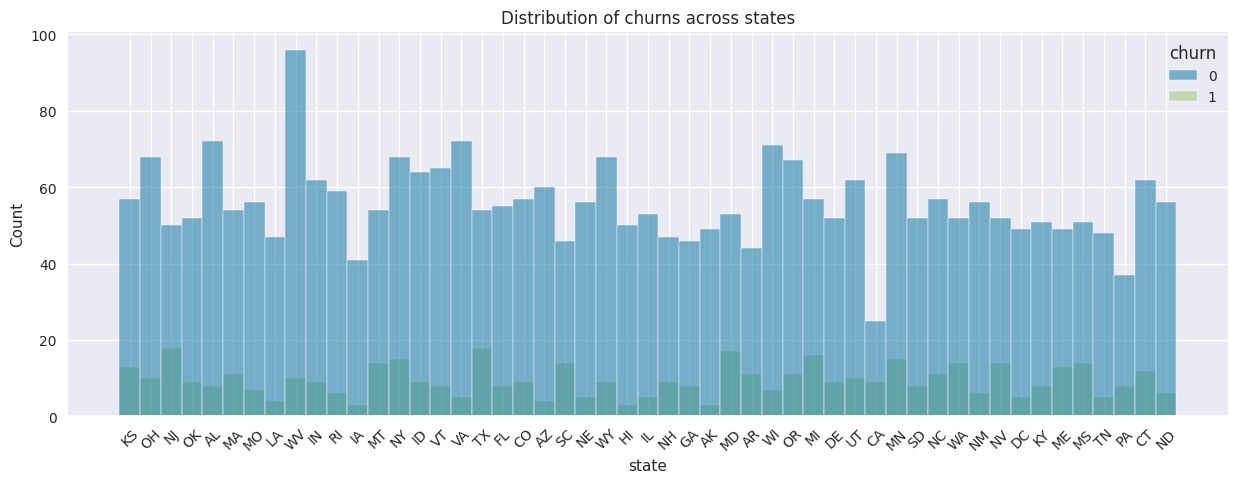

In [788]:
plt.figure(figsize=(15, 5))

sns.histplot(data=new_df, x='state', hue='churn', fill=True)
plt.xticks(rotation=45)
plt.title('Distribution of churns across states')
plt.show()

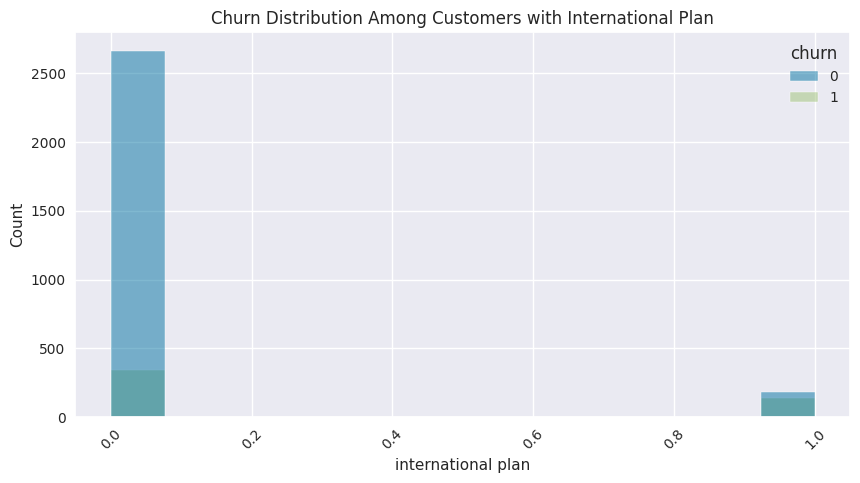

In [789]:
# Visualizing the distribution of churn among customers with international plans
plt.figure(figsize=(10, 5))

sns.histplot(data=new_df, x='international plan', hue='churn', fill=True)
plt.xticks(rotation=45)
plt.title('Churn Distribution Among Customers with International Plan')
plt.show()

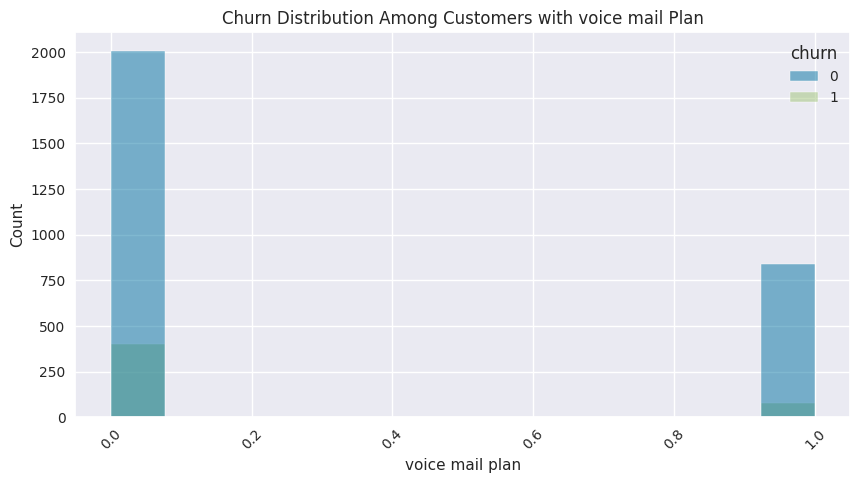

In [790]:
# Visualizing the distribution of churn among customers with voice mail plans
plt.figure(figsize=(10, 5))

sns.histplot(data=new_df, x='voice mail plan', hue='churn', fill=True)
plt.xticks(rotation=45)
plt.title('Churn Distribution Among Customers with voice mail Plan')
plt.show()

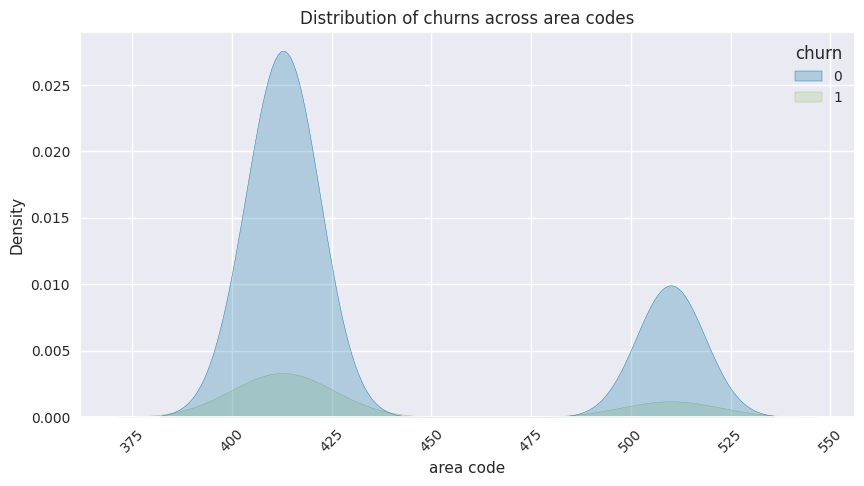

In [791]:
plt.figure(figsize=(10, 5))

sns.kdeplot(data=new_df, x='area code', hue='churn', fill=True)
plt.xticks(rotation=45)
plt.title('Distribution of churns across area codes')
plt.show()

#### **3.2.3 Multivariate analysis**

In [792]:
# import 
def drop_numerical_outliers(new_df, z_thresh=3):
    print(f"Before dropping numerical outliers, length of the dataframe is: {len(new_df)}")
    constrains = new_df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(zscore(x, ddof=1)) < z_thresh).all(axis=1)
    return new_df[constrains]

new_df = drop_numerical_outliers(new_df)
from scipy.stats import zscore

print(f"After dropping numerical outliers, length of the dataframe is: {len(new_df)}")


Before dropping numerical outliers, length of the dataframe is: 3333
After dropping numerical outliers, length of the dataframe is: 2869


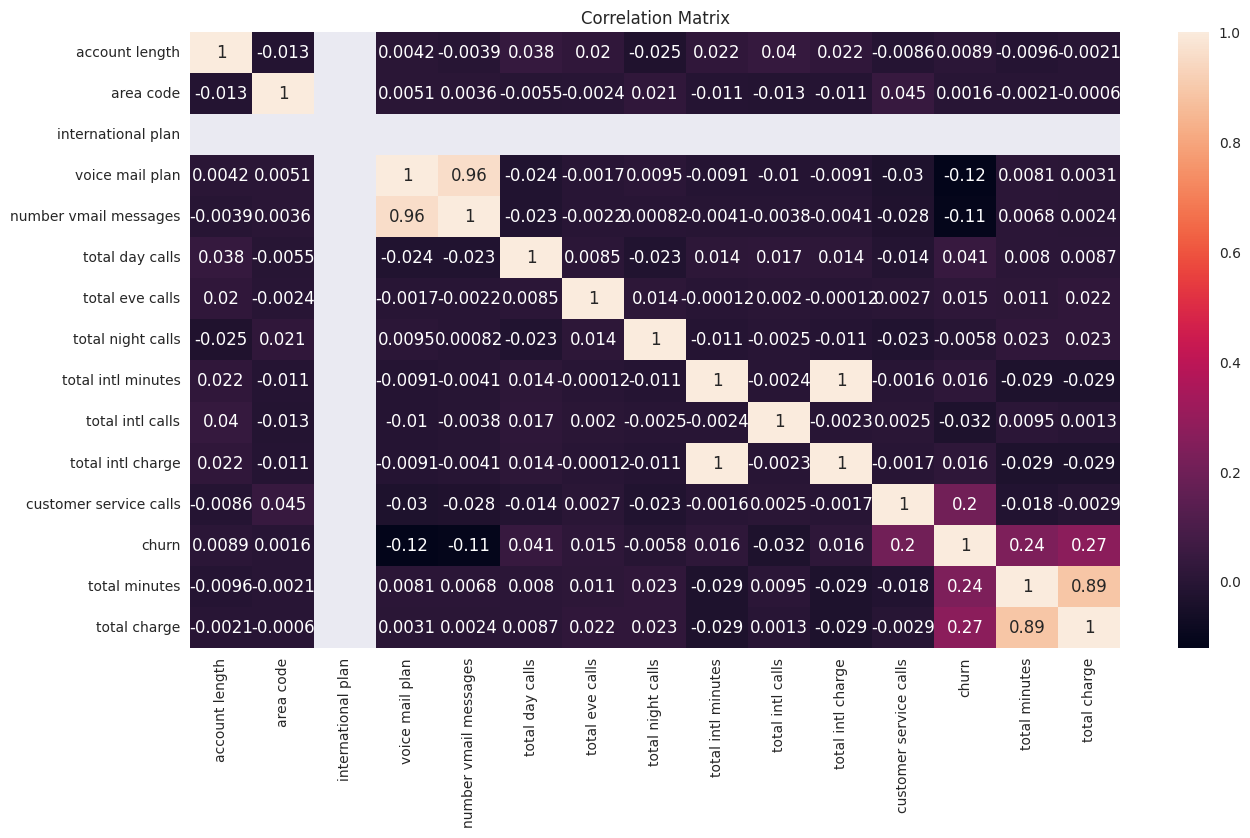

In [793]:
#Calculate the correlation matrix using the corr() method
correlation_matrix = new_df.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [794]:
# checking for multicollinearity using VIF
corr = new_df.corr().abs()

Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.items():
        if correlation >= .75 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame(
    {'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}
    ).sort_values(by='Correlations', ascending=False)
MC_df

,Correlations,Features
2,0.999992,"[total intl minutes, total intl charge]"
3,0.999992,"[total intl charge, total intl minutes]"
0,0.957046,"[voice mail plan, number vmail messages]"
1,0.957046,"[number vmail messages, voice mail plan]"
4,0.888749,"[total minutes, total charge]"
5,0.888749,"[total charge, total minutes]"


#### inference 
 - Given that random forests are not impacted by multicollinearity, we opt not to proceed with the analysis of multicollinearity

## **4. Modeling**

In [795]:
# one hot encoding categorical feature
new_df = pd.get_dummies(new_df, columns=['state', 'area code', ], drop_first=True)


In [796]:
# display the changes of the dataframe
new_df.head()

,account length,international plan,voice mail plan,number vmail messages,total day calls,total eve calls,total night calls,total intl minutes,total intl calls,total intl charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
0,128,0,1,25,110,99,91,10.0,3,2.70,...,0,0,0,0,0,0,0,0,1,0
1,107,0,1,26,123,103,103,13.7,3,3.70,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,0,114,110,104,12.2,5,3.29,...,0,0,0,0,0,0,0,0,1,0
6,121,0,1,24,88,108,118,7.5,7,2.03,...,0,0,0,0,0,0,0,0,0,1
8,117,0,0,0,97,80,90,8.7,4,2.35,...,0,0,0,0,0,0,0,0,0,0


In [797]:
# scaling numerical features in the dataframe
X = new_df.drop('churn', axis=1)
y = new_df.churn

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [798]:
# fiting in the first model using decision tree 
scaled_pipeline_1 = Pipeline([('ss', StandardScaler()),('dt', DecisionTreeClassifier(random_state=42))])

scaled_pipeline_1.fit(x_train, y_train)
scaled_pipeline_1.score(x_test, y_test)

0.9331476323119777

In [799]:
# fitting the second model using random forest with cross validation
scaled_pipeline_2 = Pipeline([('scaler', StandardScaler()), ('RF', RandomForestClassifier())])

# Perform cross-validation
cv_scores = cross_val_score(scaled_pipeline_2, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.96341463 0.96167247 0.97909408 0.97038328 0.97382199]
Mean Accuracy: 0.9696772898918219


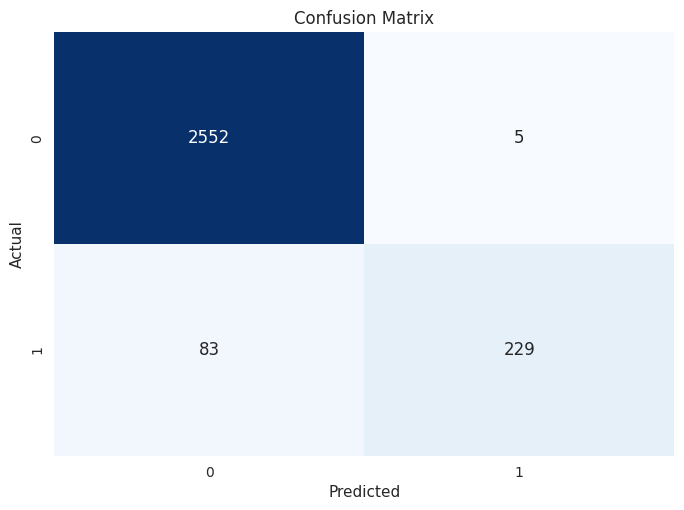

In [800]:
y_pred = cross_val_predict(scaled_pipeline_2, X, y, cv=5)
conf_matrix = confusion_matrix(y, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **5. Evaluation**

### **5.1 Conclusion**
The Decision Tree Classifier, integrated into a pipeline with standard scaling, demonstrates promising performance in predicting customer churn for SyriaTel, a telecommunications company. The model achieved a mean accuracy of approximately 96.89% across five-fold cross-validation, indicating its ability to generalize well to diverse subsets of the dataset.

The single score without cross-validation was 93.31%, and the consistency in performance across different folds suggests that the model is robust and less sensitive to variations in the training and testing datasets. The Decision Tree Classifier, with its ability to capture non-linear relationships and feature importance, proves to be a valuable tool for identifying patterns associated with customer churn.
### **5.2 Recommendations**
SyriaTel can enhance its customer retention strategy by deploying the Decision Tree Classifier for real-time churn predictions. Continuous monitoring ensures the model's ongoing effectiveness, with updates adapting to evolving customer behaviors. Leveraging feature importance insights guides targeted service improvements and personalized retention efforts. Collaborating with retention teams facilitates seamless integration and informed decision-making. Combining quantitative predictions with qualitative customer feedback provides a comprehensive understanding for nuanced retention strategies. Iterative model improvements and investments in customer experience initiatives contribute to sustained success, optimizing resource allocation and fostering long-term customer relationships in the telecommunications business.


## **Deployment**